<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Smart_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

df = pd.DataFrame({"department":['Civil','Civil','ECE','CSE','CSE','CSE','Civil','ECE','ECE','CSE'],
                   "gender":['male','male','female','male','male','female','female','female','male','male'],
                   "promotion":[1,0,1,1,1,1,0,0,1,0]})

In [51]:
df

,department,gender,promotion
0,Civil,male,1
1,Civil,male,0
2,ECE,female,1
3,CSE,male,1
4,CSE,male,1
5,CSE,female,1
6,Civil,female,0
7,ECE,female,0
8,ECE,male,1
9,CSE,male,0


In [52]:
df['promotion'].mean()

0.6

In [53]:
df.groupby('department').agg({'promotion':['count','mean']})

promotion          
               count      mean
department                    
CSE                4  0.750000
Civil              3  0.333333
ECE                3  0.666667

In [0]:
agg_gender = df.groupby('gender').agg({'promotion':['count','mean']})

In [0]:
mean_1 = agg_gender['promotion']['mean']
count_1 = agg_gender['promotion']['count']

In [56]:
mean_1

gender
female    0.500000
male      0.666667
Name: mean, dtype: float64

In [57]:
count_1

gender
female    4
male      6
Name: count, dtype: int64

In [0]:
agg_dept = df.groupby('department').agg({'promotion':['count','mean']})
count = agg_dept['promotion']['count']
mean = agg_dept['promotion']['mean']

In [59]:
count

department
CSE      4
Civil    3
ECE      3
Name: count, dtype: int64

In [60]:
mean

department
CSE      0.750000
Civil    0.333333
ECE      0.666667
Name: mean, dtype: float64

In [0]:
df['department'] = df['department'].map(mean)

In [0]:
df['gender'] = df['gender'].map(mean_1)

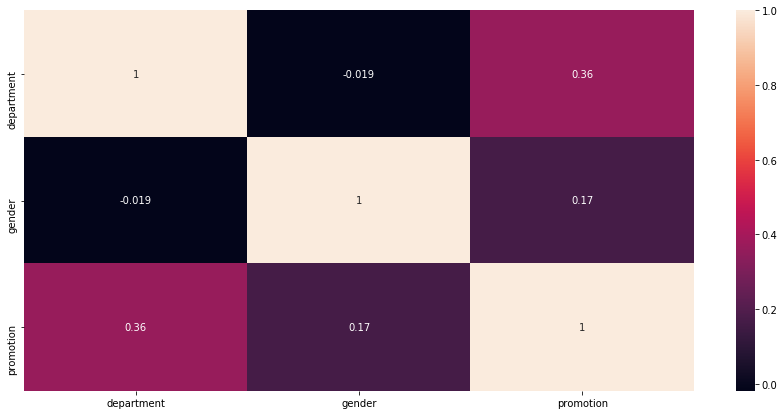

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,7))
corr = df.corr()
sns.heatmap(corr, annot = True, xticklabels=corr.columns,
        yticklabels=corr.columns)

## Median Encoding

In [0]:
df = pd.DataFrame({"department":['Civil','Civil','ECE','CSE','CSE','CSE','Civil','ECE','ECE','CSE'],
                   "gender":['male','male','female','male','male','female','female','female','male','male'],
                   "promotion":[1,0,1,1,1,1,0,0,1,0]})

In [0]:
median_dept = df.groupby('department').agg({'promotion':['count','median']})
median = median_dept['promotion']['median']

In [66]:
median

department
CSE      1
Civil    0
ECE      1
Name: median, dtype: int64

In [0]:
df['department'] = df['department'].map(median)

In [0]:
median_gend = df.groupby('gender').agg({'promotion':['count','median']})
median_1 = median_gend['promotion']['median']

In [0]:
df['gender'] = df['gender'].map(median_1)

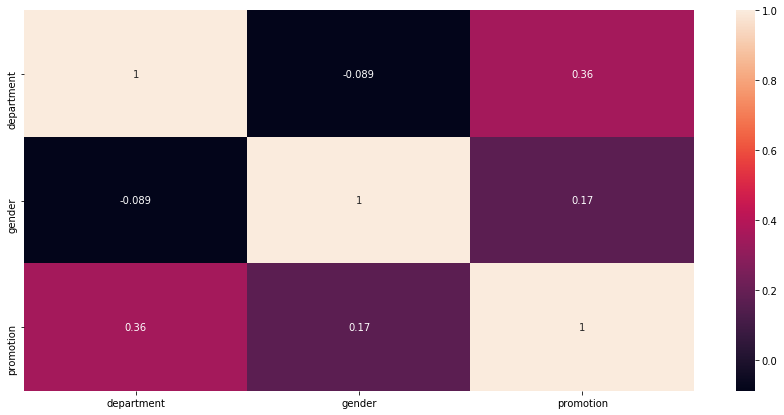

In [70]:
plt.figure(figsize = (15,7))
corr = df.corr()
sns.heatmap(corr, annot = True, xticklabels=corr.columns,
        yticklabels=corr.columns)

In [0]:
df = pd.DataFrame({"department":['Civil','Civil','ECE','CSE','CSE','CSE','Civil','ECE','ECE','CSE'],
                   "gender":['male','male','female','male','male','female','female','female','male','male'],
                   "promotion":[1,0,1,1,1,1,0,0,1,0]})

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categ_variables = ['department','gender']

for i in categ_variables:
  df[i] = le.fit_transform(df[i])

In [0]:
df = pd.get_dummies(df, columns = ['department','gender'])

In [74]:
df.head(5)

,promotion,department_0,department_1,department_2,gender_0,gender_1
0,1,0,1,0,0,1
1,0,0,1,0,0,1
2,1,0,0,1,1,0
3,1,1,0,0,0,1
4,1,1,0,0,0,1


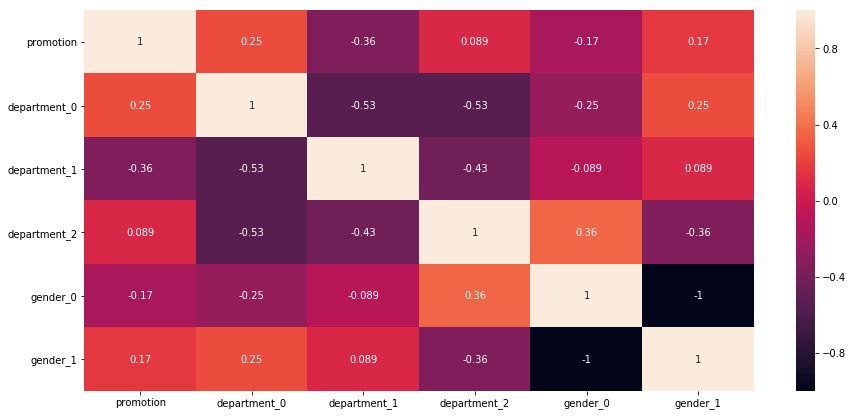

In [75]:
plt.figure(figsize = (15,7))
corr = df.corr()
sns.heatmap(corr, annot = True, xticklabels=corr.columns,
        yticklabels=corr.columns)